# Explore here

In [1]:
# Librerias necesarias para modelo de regresión logística
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
import os
import pandas as pd
import numpy as np

# Accedemos a cada train y a cada test tanto de X como de Y, y los dejamos metidos en variables para el siguiente paso!! 
# Los separamos en base path y el resto de la ruta de acceso para tener el código mas legible. 
 
BASE_PATH = "C:/Users/aguil/OneDrive/Desktop/proyectos javier/ML-WEBAPP-USING-STREAMLIT/data/Excels"
TRAIN_PATHS = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx",
    'X_train_sel_k7.xlsx'
]

# Concatenamos el base path al resto de la ruta de acceso para tener el código completo dentro de la variable que usaremos despues. 
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        # pd.read_excel(BASE_PATH + "/" + path)
        pd.read_excel(f"{BASE_PATH}/{path}") 
        # pd.read_excel(os.path.join(BASE_PATH, path))
    )

# Los separamos en base path y el resto de la ruta de acceso para tener el código mas legible. 
TEST_PATHS = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx",
    'X_test_sel_k7.xlsx'
]

# Concatenamos el base path al resto de la ruta de acceso para tener el código completo dentro de la variable que usaremos despues. 
TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

# Concatenamos el base path al resto de la ruta de acceso para tener el código completo dentro de la variable que usaremos despues. 
y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")

### Random forest

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Le pasamos los train y los test al modelo , lo entrenamos y metemos los resultados del test en una lista para poder comparar y escoger el mejor. 

results = []

for index, dataset in enumerate(TRAIN_DATASETS):
    print(index)
    model = RandomForestClassifier(random_state = 77, class_weight = 'balanced')
    
    model.fit(dataset, y_train)
    y_pred_train = model.predict(dataset)
    y_pred_test = model.predict(TEST_DATASETS[index])

    results.append(
        {
            "train": accuracy_score(y_train, y_pred_train),
            "test": accuracy_score(y_test, y_pred_test)
        }
    )

results

0


C:\Users\aguil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1


C:\Users\aguil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


2


C:\Users\aguil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[{'train': 1.0, 'test': 0.7532467532467533},
 {'train': 1.0, 'test': 0.7597402597402597},
 {'train': 1.0, 'test': 0.7597402597402597}]

In [4]:
# Optimización del modelo. 

best_dataset = 2 # Porque de results, el mayor acuracy en train y test.

# Ponemos los hyperparametros según la documentación.  

hyperparams = {
    'n_estimators': [50],  # Número de árboles
    'criterion': ['entropy'],  # Método para evaluar divisiones
    'max_depth': [5],  # Profundidad máxima de los árboles
    'min_samples_split': [10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [5],  # Mínimo de muestras para tener un nodo hoja
    'max_leaf_nodes': [20],  # Máximo de nodos hoja
}

from sklearn.model_selection import GridSearchCV 

model = RandomForestClassifier(random_state = 77, class_weight = 'balanced') # Volvemos a seleccionar el modelo sin entrenar. 
grid = GridSearchCV(model, hyperparams, scoring = "accuracy") # Metemos en el gris los nuevos hyperparametros

In [5]:
# Entrenamos el modelo con los nuevos parametros. 

grid.fit(TRAIN_DATASETS[best_dataset], y_train)

C:\Users\aguil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\aguil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\aguil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=77),
             param_grid={'criterion': ['entropy'], 'max_depth': [5],
                         'max_leaf_nodes': [20], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'n_estimators': [50]},
             scoring='accuracy')

In [6]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_leaf_nodes=20, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50, random_state=77)

In [7]:
# Predecimos con el nuevo modelo ya entrenado por los unevos parametros.  

final_model = grid.best_estimator_
y_pred_train = final_model.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = final_model.predict(TEST_DATASETS[best_dataset])

In [8]:
score_train = accuracy_score(y_train, y_pred_train),
score_test = accuracy_score(y_test, y_pred_test)

print(f'Score train: {score_train}')
print(f'Score test: {score_test}')

Score train: (0.8306188925081434,)
Score test: 0.7532467532467533


In [9]:
from sklearn.metrics import recall_score

score_train = recall_score(y_train, y_pred_train),
score_test = recall_score(y_test, y_pred_test)

print(f'Score train: {score_train}')
print(f'Score test: {score_test}')

Score train: (0.8779342723004695,)
Score test: 0.8181818181818182


Calculamos el recall para obtener la proporción de verdaderos positivos y ver un posible desbalance de clases. (Aunque ahora ya no aparezca reflejado en el recall el desbalance porque ya esta corregido a través de parametros, antes de hacerlo los valores eran Score train: 0.90, Score test: 0.65). 


In [10]:
import pandas as pd

class_counts = pd.Series(y_test.iloc[:, 0]).value_counts()  # Extraemos la primera columna del DataFrame

print('Distribución de clases en el conjunto de prueba:')
print(class_counts)


Distribución de clases en el conjunto de prueba:
Outcome
0    99
1    55
Name: count, dtype: int64


Observamos un desblaance de clases. 

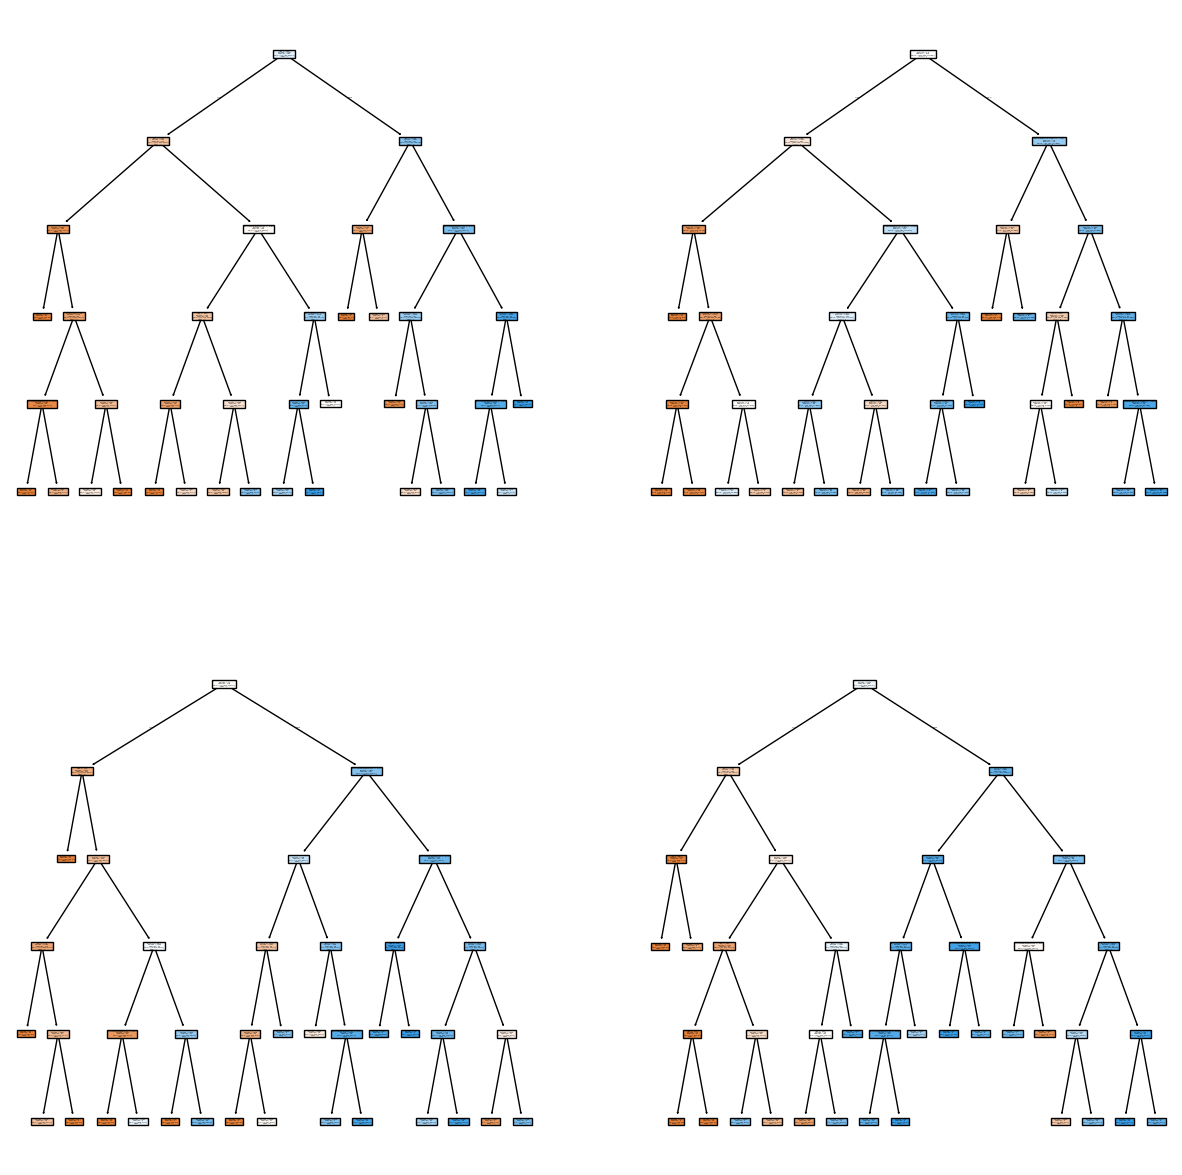

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

final_model = grid.best_estimator_
column_names = TRAIN_DATASETS[best_dataset].columns.tolist()

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(final_model.estimators_[0], ax = axis[0, 0], feature_names = column_names, class_names = ["0", "1"], filled = True)
tree.plot_tree(final_model.estimators_[1], ax = axis[0, 1], feature_names = column_names, class_names = ["0", "1"], filled = True)
tree.plot_tree(final_model.estimators_[2], ax = axis[1, 0], feature_names = column_names, class_names = ["0", "1"], filled = True)
tree.plot_tree(final_model.estimators_[3], ax = axis[1, 1], feature_names = column_names, class_names = ["0", "1"], filled = True)

plt.show()

In [12]:
import pickle

with open("C:/Users/aguil/OneDrive/Desktop/proyectos javier/ML-WEBAPP-USING-STREAMLIT/src/models/Random_forest_model.sav", "wb") as file:
    pickle.dump(final_model, file)

### Análisis final

El modelo antes se memorizaba los datos y fallaba con información nueva, además ignoraba las categorías con pocos ejemplos. Usé class_weight='balanced' para dar más peso a las clases minoritarias y ajusté los parámetros. Ahora generaliza mejor (diferencia train-test <8%) y detecta más casos importantes, sin sobreajuste.